In [785]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.signal import find_peaks, peak_widths

from qutip import *


font = {
    'family': 'serif',
    'color': 'black',
    'weight': 'normal',
    'size': 16,
}

In [786]:
#SIMULATION RESONANT SATURATION

s_ = sigmam()

N_int = 50
vI = np.logspace(-1, 5, N_int)  # vector intensity in W/cm^2

NDe = 20000
vDelta = np.linspace(-80,80,NDe)    #vector Detuning in GHz (frequency, already without 2/pi)

Isat = 4e-1    # W/(cm^2)
Om_s = 1e-2     # GHz (frequency, already without 2/pi)

gam = .1    # radiative rate in GHz

dark_state_gauge = 1e-5
scaling_exp_ds = 1.5

arr_res_pop = np.zeros(shape=(N_int,NDe) )  #array to store the population

for nI, I in enumerate(vI):
    Om = Om_s * (I/Isat)**.5

    Gam_p1 = dark_state_gauge * Om_s * (I/Isat)**scaling_exp_ds
    
    for nD, Delta in enumerate(vDelta):
        H = Delta * s_.dag()*s_ + Om * ( s_ + s_.dag() )
        c_jumps = [ ( gam + Gam_p1 )**.5 * s_ ]
        rhoss = steadystate(H, c_jumps)
        arr_res_pop[nI][nD] = expect(s_.dag()*s_, rhoss)
        

fwhm_all = []
for nI in range(arr_res_pop.shape[0]):
    y = arr_res_pop[nI]
    peaks, _ = find_peaks(y)
    if len(peaks) == 0:
        fwhm_all.append(np.nan)
        continue
    p = peaks[np.argmax(y[peaks])]
    width = peak_widths(y, [p], rel_height=0.5)[0][0]
    fwhm_all.append(width)
fwhm_all_sim = np.array(fwhm_all)

Fluo_sim = np.zeros(N_int)
for nI, I in enumerate(vI):
    Fluo_sim[nI] = np.amax(arr_res_pop[nI])

max_fluo_gauge_simulation = 1
S_sim = max_fluo_gauge_simulation*2*Fluo_sim/(1. - max_fluo_gauge_simulation*2*Fluo_sim)
dom = abs(vDelta[1]-vDelta[0])
gam_sim = fwhm_all_sim*dom /(1+S_sim)**.5

DW_sim = S_sim/vI * gam_sim**2
DW_sim = DW_sim/np.amax(DW_sim)

In [787]:
file_path = "v2/202512_power_scan.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
Fluo_pow1       = data["A"].to_numpy()
FWHM_pow1       = data["fwhm"].to_numpy()
I_pow1       = data["intensity"].to_numpy()
S_pow1    = data["S"].to_numpy()

Gam_pow1 = FWHM_pow1/(1+S_pow1)**.5

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("Fluo:", Fluo_pow1.shape, "→", Fluo_pow1[:5])
print("FWHM_pow:", FWHM_pow1.shape, "→", FWHM_pow1[:5])
print("I:", I_pow1.shape, "→", I_pow1[:5])
print("S:", S_pow1.shape, "→", S_pow1[:5])



,A,fwhm,intensity,S
0,300.077240,9.946400e+07,0.320397,0.049505
1,305.815098,1.067719e+08,0.320397,0.050500
2,337.995382,6.795428e+07,0.320397,0.056112
3,132.560962,1.108078e+08,0.091542,0.021281
4,171.386444,6.673294e+07,0.091542,0.027687


Fluo: (56,) → [300.07724022 305.81509767 337.99538171 132.56096206 171.38644418]
FWHM_pow: (56,) → [9.94639960e+07 1.06771883e+08 6.79542836e+07 1.10807840e+08
 6.67329400e+07]
I: (56,) → [0.32039682 0.32039682 0.32039682 0.09154195 0.09154195]
S: (56,) → [0.04950532 0.05049973 0.05611189 0.02128115 0.02768671]


In [788]:
file_path = "S_parameter_vs_temp.csv"

# Read the CSV file using pandas
data = pd.read_csv(file_path)

# Display the first few rows to verify
display(data.head())

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
T_pow2       = data["Temperature [K]"].to_numpy()
I_pow2       = data["Intensity [W/cm²]"].to_numpy()
S_pow2       = data["S"].to_numpy()
FWHM_pow2    = data["FWHM [Hz]"].to_numpy()
Gam_pow2 = data["FWHM deph + FWHM0 [Hz]"].to_numpy()
Fluo_pow2    = data["Fluorescence [cps]"].to_numpy()

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("T:", T_pow2.shape, "→", T_pow2[:5])
print("I:", I_pow2.shape, "→", I_pow2[:5])
print("S:", S_pow2.shape, "→", S_pow2[:5])
print("FWHM:", FWHM_pow2.shape, "→", FWHM_pow2[:5])
print("Gam_tot:", Gam_pow2.shape, "→", Gam_pow2[:5])
print("Fluo:", Fluo_pow2.shape, "→", Fluo_pow2[:5])

,Temperature [K],Intensity [W/cm²],S,FWHM [Hz],FWHM deph + FWHM0 [Hz],Fluorescence [cps]
0,4.731820,0.428243,0.108321,2.535635e+08,2.408540e+08,15550.338565
1,4.777749,0.428243,0.123954,2.635728e+08,2.486144e+08,17547.096787
2,4.490514,0.428243,0.100211,2.133204e+08,2.033736e+08,14492.044091
3,5.075639,0.856485,0.225183,3.367827e+08,3.042631e+08,29243.322029
4,4.551905,1.712970,0.394787,2.508496e+08,2.124025e+08,45034.647029


T: (49,) → [4.73181998 4.77774867 4.49051393 5.07563945 4.55190483]
I: (49,) → [0.42824258 0.42824258 0.42824258 0.85648516 1.71297031]
S: (49,) → [0.10832125 0.12395445 0.10021059 0.22518313 0.39478694]
FWHM: (49,) → [2.53563457e+08 2.63572818e+08 2.13320427e+08 3.36782713e+08
 2.50849642e+08]
Gam_tot: (49,) → [2.40853984e+08 2.48614391e+08 2.03373581e+08 3.04263100e+08
 2.12402464e+08]
Fluo: (49,) → [15550.33856457 17547.09678679 14492.04409057 29243.32202877
 45034.64702943]


/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_41752/931025781.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.96])  # shrink axes area a bit to leave room on top


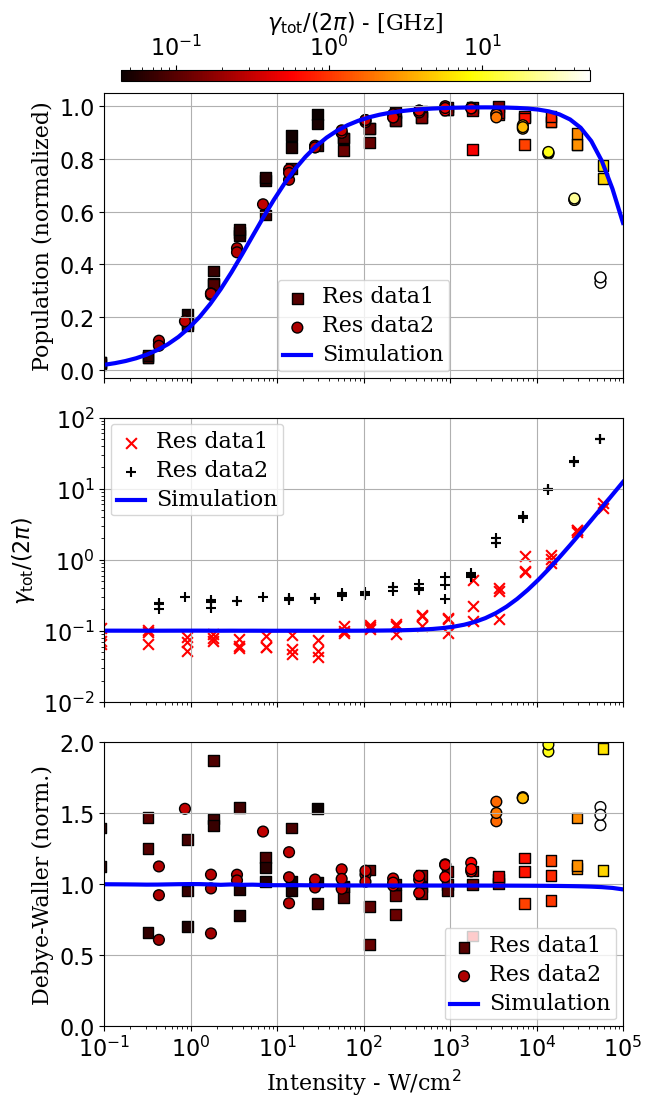

In [795]:
# -------------------------------------------------
# Shared color normalization (panel 1 & 3)
# -------------------------------------------------
vmin = min(np.amin(Gam_pow1), np.amin(Gam_pow2)) * 1e-9
vmax = max(np.amax(Gam_pow1), np.amax(Gam_pow2)) * 1e-9
norm = LogNorm(vmin=vmin, vmax=vmax)

# -------------------------------------------------
# Derived quantities for panel 3
# -------------------------------------------------
gauge_factor = 2.4
DW1 = (S_pow1 / I_pow1) * Gam_pow1**2
DW1 = DW1 / np.amax(DW1) * gauge_factor

DW2 = (S_pow2 / I_pow2) * Gam_pow2**2
DW2 = DW2 / np.amax(DW2) * gauge_factor

# -------------------------------------------------
# Figure + axes (vertical stack, shared x)
# -------------------------------------------------
fig, axes = plt.subplots(
    3, 1,
    sharex=True,
    figsize=(170/25.4, 300/25.4),   # adjust height as you like
    gridspec_kw=dict(hspace=0.14)   # tight vertical spacing
)

# =================================================
# PANEL 1 — Population vs Intensity (colored by Γ)
# =================================================
ax = axes[0]
sc1 = ax.scatter(
    I_pow1, Fluo_pow1 / np.amax(Fluo_pow1),
    c=Gam_pow1 * 1e-9, cmap='hot', norm=norm,
    s=60, edgecolor='k', marker='s', label=r"Res data1"
)
ax.scatter(
    I_pow2, Fluo_pow2 / np.amax(Fluo_pow2),
    c=Gam_pow2 * 1e-9, cmap='hot', norm=norm,
    s=60, edgecolor='k', marker='o', label=r"Res data2"
)

ax.plot(vI, 2*Fluo_sim, linewidth=3, color='blue', label=r'Simulation')

ax.set_xscale('log')
ax.set_xlim(1e-1, 1e5)
ax.set_ylabel(r"Population (normalized)", fontdict=font)
ax.grid()

leg = ax.legend()
for text in leg.get_texts():
    text.set_fontsize(font['size'])
    text.set_fontname(font['family'])
    text.set_weight(font['weight'])
    text.set_color(font['color'])

ax.tick_params(labelsize=font['size'], labelcolor=font['color'])

# =================================================
# PANEL 2 — Γ vs Intensity (log–log)
# =================================================
ax = axes[1]
ax.scatter(I_pow1, Gam_pow1*1e-9, color='red', marker='x', s=60, label=r"Res data1")
ax.scatter(I_pow2, Gam_pow2*1e-9, color='black', marker='+', s=60, label=r"Res data2")

ax.plot(vI, gam_sim, linewidth=3, color='blue', label=r'Simulation')


ax.set_yscale('log')
ax.set_xlim(1e1, 1e5)
ax.set_ylim(1e-2, 1e2)
ax.set_ylabel(r"$\gamma_{\rm tot}/(2\pi)$", fontdict=font)
ax.grid()

leg = ax.legend()
for text in leg.get_texts():
    text.set_fontsize(font['size'])
    text.set_fontname(font['family'])
    text.set_weight(font['weight'])
    text.set_color(font['color'])

ax.tick_params(labelsize=font['size'], labelcolor=font['color'])

# =================================================
# PANEL 3 — Debye–Waller vs Intensity (colored by Γ)
# =================================================
ax = axes[2]
sc3 = ax.scatter(
    I_pow1, DW1,
    c=Gam_pow1 * 1e-9, cmap='hot', norm=norm,
    s=60, edgecolor='k', marker='s', label=r"Res data1"
)
ax.scatter(
    I_pow2, DW2,
    c=Gam_pow2 * 1e-9, cmap='hot', norm=norm,
    s=60, edgecolor='k', marker='o', label=r"Res data2"
)

ax.plot(vI, DW_sim, color='blue', linewidth=3, label=r'Simulation')

ax.set_xlim(1e-1, 1e5)
ax.set_ylim(0, 2)
ax.set_ylabel(r"Debye-Waller (norm.)", fontdict=font)
ax.set_xlabel(r"Intensity - W/cm$^2$", fontdict=font)
ax.grid()

leg = ax.legend()
for text in leg.get_texts():
    text.set_fontsize(font['size'])
    text.set_fontname(font['family'])
    text.set_weight(font['weight'])
    text.set_color(font['color'])

ax.tick_params(labelsize=font['size'], labelcolor=font['color'])
ax.set_yticks(np.arange(0, 2.01, 0.5))

# -------------------------------------------------
# Show x tick labels only on bottom panel
# -------------------------------------------------
for ax in axes[:-1]:
    ax.tick_params(labelbottom=False)


# Leave room at the top
fig.subplots_adjust(top=0.9)

# Create an independent axis for the colorbar
cax = fig.add_axes([0.15, 0.91, 0.70, 0.01])
# [left, bottom, width, height] in figure coordinates

cbar = fig.colorbar(
    sc1,
    cax=cax,
    orientation='horizontal'
)

cbar.set_label(r"$\gamma_{\rm tot}/(2\pi)$ - [GHz]", fontdict=font)
cbar.ax.tick_params(
    labelsize=font['size'],
    labelcolor=font['color']
)
cbar.ax.xaxis.set_ticks_position('top')
cbar.ax.xaxis.set_label_position('top')


# -------------------------------------------------
# Layout: reserve space for top colorbar
# -------------------------------------------------
plt.tight_layout(rect=[0, 0, 1, 0.96])  # shrink axes area a bit to leave room on top

#plt.savefig('DW_res_pump.pdf')

plt.show()

In [790]:
file_path = "off_res/20250409-1233-37_power_sweep_plot_8.dat"
data = np.loadtxt(file_path, comments="#", delimiter='\t')
display(data.shape)
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
Pow_off1       = data[:, 0]
Fluo_off1       = data[:, 1]

# Jupyter Notebook cell 4 — Check the extracted arrays
print("P1:", Pow_off1.shape, "→", Pow_off1[:5])
print("F1:", Fluo_off1.shape, "→", Fluo_off1[:5])

#conversion power to intensity
NA0 = 0.7   #numerical aperture setup
waist0 = 767*1e-7/(np.pi*NA0)   #laser beam waist
setup_eff0 = 3./7.  #setup efficiency -> ask hugo
conversion_fact = 2*setup_eff0/(np.pi*waist0**2)

I_off1 = conversion_fact * Pow_off1


(2999, 6)

P1: (2999,) → [7.58232591e-06 7.58189062e-06 7.58083360e-06 7.57761028e-06
 7.57277794e-06]
F1: (2999,) → [63900. 64800. 67400. 65700. 65650.]


In [791]:
file_path = "off_res/20250409-1322-38_power_sweep_plot_3.dat"

data = np.loadtxt(file_path, comments="#", delimiter='\t')


display(data.shape)

# %%
# Jupyter Notebook cell 3 — Extract columns into NumPy arrays
Pow_off2       = data[:, 0]
Fluo_off2       = data[:, 1]

# %%
# Jupyter Notebook cell 4 — Check the extracted arrays
print("P1:", Pow_off2.shape, "→", Pow_off2[:5])
print("F1:", Fluo_off2.shape, "→", Fluo_off2[:5])


NA0 = 0.7
waist0 = 767*1e-7/(np.pi*NA0)
setup_eff0 = 3./7.
conversion_fact = 2*setup_eff0/(np.pi*waist0**2)

I_off2 = conversion_fact * Pow_off2


(2997, 6)

P1: (2997,) → [3.78861805e-05 3.36962896e-05 2.89112332e-05 2.68839934e-05
 2.49517672e-05]
F1: (2997,) → [139000. 124850.  21300.  18950.  16750.]


In [792]:
#SIMULATION OFF RESONANT SATURATION

N_int_off = 100
vI_off = np.logspace(3, 7, N_int_off)  # vector intensity in W/cm^2

gam_v = 20
eta = .2

suppress_off = 1e0

arr_pop_off = np.zeros(N_int_off)


for nI, Ioff in enumerate(vI_off):
    Om = Om_s * (Ioff/Isat)**.5

    #Gam_pump = eta**2 * Om**2 / gam_v
    Gam_p1 = dark_state_gauge * Om_s * (Ioff/Isat)**(1.*scaling_exp_ds) #* eta**2

    Gam_pump = eta**2 * Om**2 / (gam_v**2 + Gam_p1**2 *suppress_off )**.5
    c_jumps = [ gam **.5 * s_, Gam_pump**.5 * s_.dag() ]
    
    H = 0 * s_.dag()*s_ 
    #c_jumps = [ (gam + Gam_p1)**.5 * s_, Gam_pump**.5 * s_.dag() ]
    rhoss = steadystate(H, c_jumps)
    arr_pop_off[nI] = expect(s_.dag()*s_, rhoss)
    if nI % 10 == 0:
        print( Ioff, np.around(100*Gam_p1/gam_v, decimals=1) )

print(np.amax(arr_pop_off))
S_off_sim = arr_pop_off / (1.-arr_pop_off) 


1000.0 0.1
2535.3644939701117 0.3
6428.073117284319 1.0
16297.508346206434 4.1
41320.124001153345 16.6
104761.57527896661 67.0
265608.7782946684 270.5
673415.0657750828 1092.2
1707352.6474706922 4409.3
4328761.281083061 17800.2
0.3321207443465625


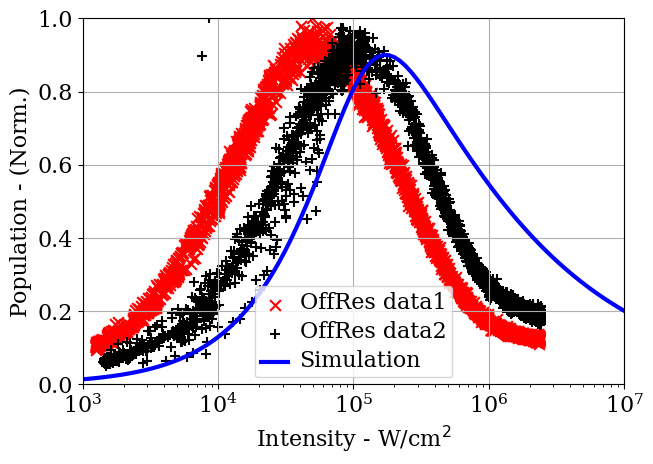

In [793]:
plt.scatter(I_off1, Fluo_off1/np.amax(Fluo_off1), color='red', marker='x', s=60, label=r"OffRes data1")
plt.scatter(I_off2, Fluo_off2/np.amax(Fluo_off2), color='black', marker='+', s=60, label=r"OffRes data2")

plt.plot(vI_off, .9*arr_pop_off/np.amax(arr_pop_off), linewidth=3, color='blue', label=r'Simulation')

plt.xscale('log')
#plt.yscale('log')
plt.xlim(1e3,1e7)
plt.ylim(0,1)

plt.xlabel(r"Intensity - W/cm$^2$", fontdict=font)
plt.ylabel(r"Population - (Norm.)", fontdict=font)

leg = plt.legend()
for text in leg.get_texts():
    text.set_fontsize(font['size'])
    text.set_fontname(font['family'])
    text.set_weight(font['weight'])
    text.set_color(font['color'])

plt.xticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])
plt.yticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])

plt.grid()

plt.tight_layout()
# Adjust layout
plt.gcf().set_size_inches(170 / 25.4, 120 / 25.4)
plt.show()

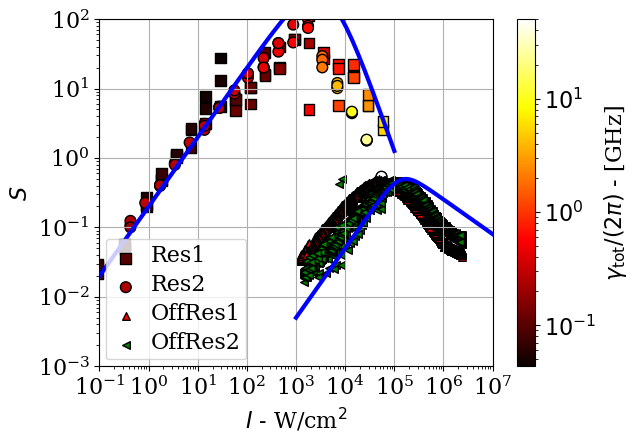

In [794]:
sat_off1 = np.amax(arr_pop_off)
S_off1 = sat_off1*Fluo_off1/np.amax(Fluo_off1) / (1.-sat_off1*Fluo_off1/np.amax(Fluo_off1)) 

sat_off2 = np.amax(arr_pop_off)
S_off2 = sat_off2*Fluo_off2/np.amax(Fluo_off2) / (1.-sat_off2*Fluo_off2/np.amax(Fluo_off2)) 


# --- Determine common color scale for both datasets
vmin = min(np.min(Gam_pow1*1e-9), np.min(Gam_pow2*1e-9))
vmax = max(np.max(Gam_pow1*1e-9), np.max(Gam_pow2*1e-9))
norm = LogNorm(vmin=vmin, vmax=vmax)

# --- Create combined figure
plt.figure(figsize=(6, 4))

sc1 = plt.scatter(
    I_pow1, S_pow1,
    c=Gam_pow1*1e-9,
    cmap='hot',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='s',
    label="Res1"
)

sc2 = plt.scatter(
    I_pow2, S_pow2,
    c=Gam_pow2*1e-9,
    cmap='hot',
    norm=norm,
    s=60,
    edgecolor='k',
    marker='o',
    label="Res2"
)


sc3 = plt.scatter(
    I_off1, S_off1,
    s=30,
    color='red',
    edgecolor='k',
    marker='^',
    label="OffRes1"
)

sc4 = plt.scatter(
    I_off2, S_off2,
    s=30,
    color='green',
    edgecolor='k',
    marker='<',
    label="OffRes2"
)

plt.plot( vI,S_sim, color='blue', linewidth=3)
plt.plot( vI_off, S_off_sim, color='blue', linewidth=3)


# --- Colorbar and labels
cbar1 = plt.colorbar(sc1)
cbar1.set_label(r"$\gamma_{\rm tot}/(2\pi)$ - [GHz]")

#cbar2 = plt.colorbar(sc2)

cbar1.set_label(r"$\gamma_{\rm tot}/(2\pi)$ - [GHz]", fontdict=font)
cbar1.ax.tick_params(
    labelsize=font['size'],
    labelcolor=font['color']
)
cbar1.ax.xaxis.set_ticks_position('top')
cbar1.ax.xaxis.set_label_position('top')

#cbar2.set_label("Intensity I (log scale)")

plt.xlabel(r"$I$ - W/cm$^2$", fontdict=font)
plt.ylabel(r"$S$", fontdict=font)
plt.xlim(1e-1,1e7)
plt.ylim(1e-3,1e2)
plt.yscale('log') 
plt.xscale('log') 

plt.xticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])
plt.yticks(fontsize=font['size'], fontname=font['family'], weight=font['weight'], color=font['color'])
leg = plt.legend()
for text in leg.get_texts():
    text.set_fontsize(font['size'])
    text.set_fontname(font['family'])
    text.set_weight(font['weight'])
    text.set_color(font['color'])

plt.grid()

plt.tight_layout()
# Adjust layout
plt.gcf().set_size_inches(170 / 25.4, 120 / 25.4)
plt.show()